<a href="https://colab.research.google.com/github/jrolopez20/blu-ml/blob/main/3_Modeling_expanded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies.
!pip install xgboost==1.2
!pip install imbalanced-learn==0.9.1
!pip install lime
!pip install shap
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8b221c5155b8c9d678174deaaba058825ac8838c627be27bae0d0729975123ea
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.3 MB/s eta 0:00:00


# 1. Import required libraries

In [ ]:
# Import required dependencies
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from datetime import datetime

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, make_scorer, precision_score, recall_score

from xgboost import XGBClassifier
import xgboost as xgb_lib

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm
import sklearn

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from collections import Counter
import shap

from io import StringIO

# ----------------
import sklearn.datasets
import sklearn.ensemble
import lime
import lime.lime_tabular
from __future__ import print_function

# Allow pandas to display all columns from a dataframe
pd.options.display.max_columns = None



# !pip install plotly
from plotly import graph_objects as go


# 2. Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Readind data
df = pd.read_csv('/content/drive/MyDrive/Maestria/modelo/data/all.csv')
df.head()

,factura_importe,credito_fecha_inicio,credito_fecha_fin,fecha_pago,porcentaje_adelanto,linea_limite,cliente_regimen_fiscal,cliente_ocupacion,cliente_sector,pagador_rfc,pagador_scian_nombre,cliente_edad,payment_term,NumberTotalPaidInvoices,NumberInvoicesPaidLate,RatioInvoicesPaidLate,SumAmountTotalPaidInvoices,SumAmountInvoicesPaidLate,RatioSumAmountInvoicesPaidLate,AvgDaysLateInvoicesPaidLate,NumberTotalOutstandingInvoices,NumberOutstandingLateInvoices,RatioOutstandingLateInvoices,SumAmountTotalOutstandingInvoices,SumAmountOutstandingLateInvoices,RatioSumAmountOutstandingLateInvoice,AvgDaysLateOutstandingInvoicesBeingLate,PaidTime
0,6905230.58,2022-07-01,2022-11-18,2022-07-18,90.0,20000000.0,0,FABRICACION DE ESTRUCTURAS DE METAL,0,GMM3612284D0,Fabricación de automóviles y camionetas,60.0,140.0,49,1,0.020408,31836238.82,137688.20,0.004325,6.0,0,0,0.0,0.0,0.0,0.0,0.0,1
1,5486110.96,2021-12-30,2022-03-04,2022-02-28,85.0,375000.0,0,FABRICACION DE REFACCIONES Y MAQUINARIA INDUST...,0,EME8409145T2,NaN,11.0,64.0,0,0,0.000000,0.00,0.00,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1
2,5464161.79,2022-11-25,2023-04-21,2022-12-23,90.0,20000000.0,0,FABRICACION DE ESTRUCTURAS DE METAL,0,CMZ840522T3A,Comercio al por mayor de cerveza,60.0,147.0,0,0,0.000000,0.00,0.00,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1
3,5286577.84,2022-12-22,2023-01-20,2023-01-06,85.0,9000000.0,0,CONSTRUCCION DE ESTADIOS MONUMENTOS Y OTRAS OB...,0,MCA900621K92,Minería de cobre,10.0,29.0,13,4,0.307692,24832580.74,6848070.24,0.275770,4.0,0,0,0.0,0.0,0.0,0.0,0.0,1
4,5198617.84,2022-03-25,2022-09-27,2022-05-06,90.0,20000000.0,0,FABRICACION DE ESTRUCTURAS DE METAL,0,GMM3612284D0,Fabricación de automóviles y camionetas,60.0,186.0,43,1,0.023256,17600606.68,137688.20,0.007823,6.0,8,0,0.0,4078948.6,0.0,0.0,0.0,1


In [ ]:
df.drop([
    "cliente_sector","cliente_regimen_fiscal", "cliente_ocupacion",
    "credito_fecha_inicio",	"credito_fecha_fin",	"fecha_pago",
    "pagador_rfc", "pagador_scian_nombre"
], axis=1, inplace=True)

# 3. Data Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24003 entries, 0 to 24002
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   factura_importe                          24003 non-null  float64
 1   porcentaje_adelanto                      24003 non-null  float64
 2   linea_limite                             24003 non-null  float64
 3   cliente_edad                             24003 non-null  float64
 4   payment_term                             24003 non-null  float64
 5   NumberTotalPaidInvoices                  24003 non-null  int64  
 6   NumberInvoicesPaidLate                   24003 non-null  int64  
 7   RatioInvoicesPaidLate                    24003 non-null  float64
 8   SumAmountTotalPaidInvoices               24003 non-null  float64
 9   SumAmountInvoicesPaidLate                24003 non-null  float64
 10  RatioSumAmountInvoicesPaidLate           24003

1    12253
3     4493
2     4108
4     1976
5     1173
Name: PaidTime, dtype: int64


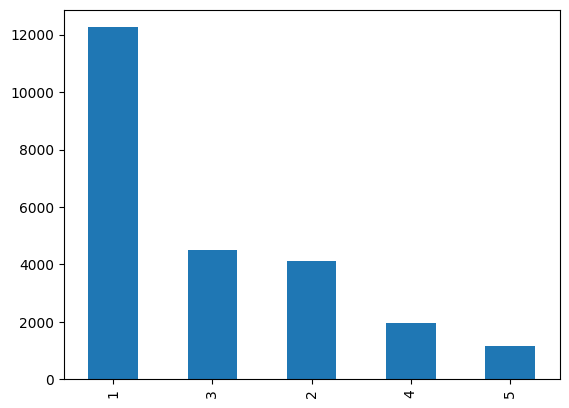

In [ ]:
# Class classification
df['PaidTime'].value_counts().plot(kind='bar')
print(df['PaidTime'].value_counts())

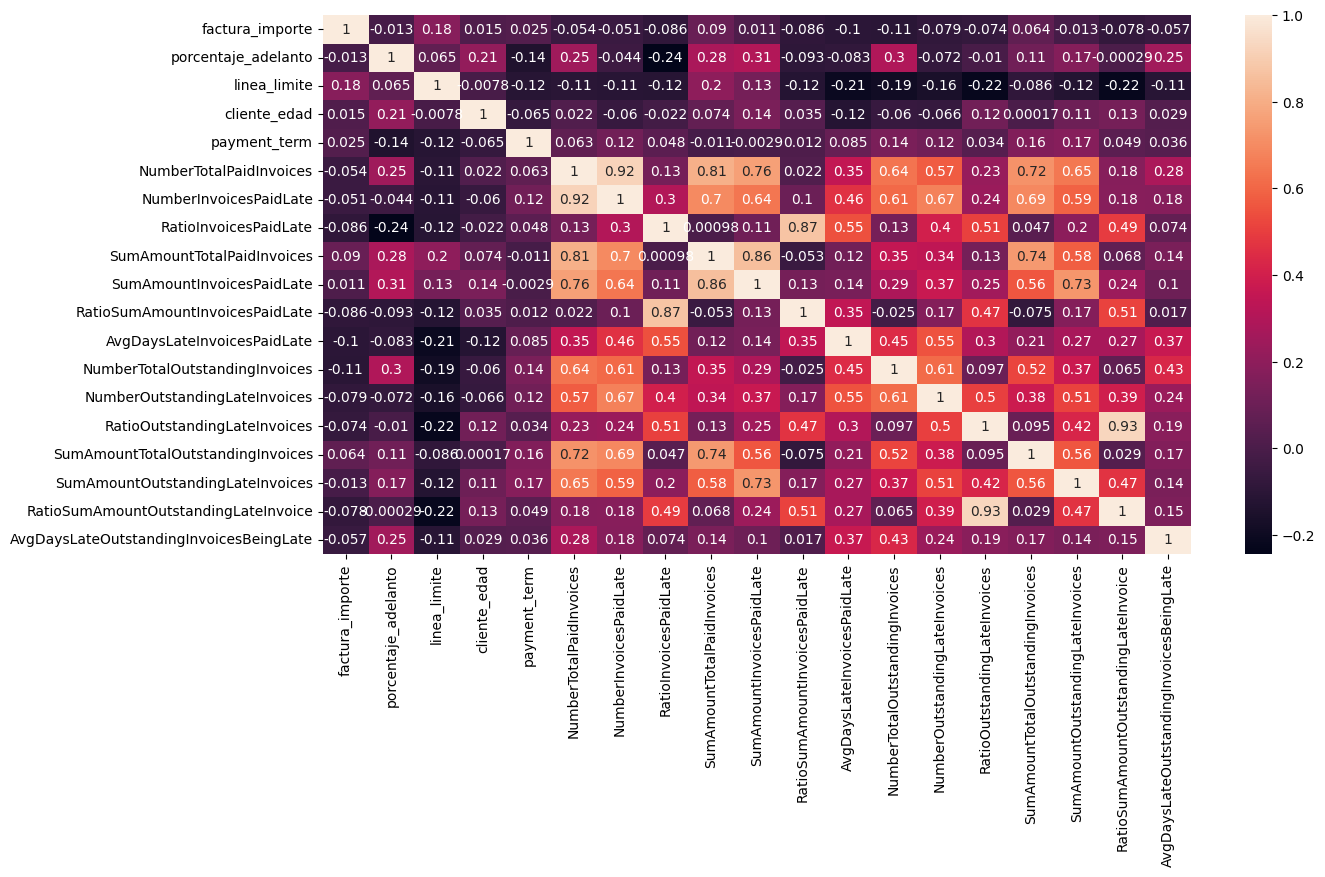

In [ ]:
features_df = df.drop(['PaidTime'], axis=1)
corr_df = features_df.corr(method='pearson')
# print("The correlation DataFrame is:")
# print(corr_df, "\n")

plt.figure(figsize=(14, 7))
sns.heatmap(corr_df, annot=True)
plt.show()

# 4. Prepare dataframes for modeling approaches

## 4.1 Separate target for predictions

In [ ]:
X = df.drop(['PaidTime'], axis=1)
y = df.PaidTime

In [ ]:
print('X:', X.shape)
print('y:', y.shape)

X: (24003, 19)
y: (24003,)


In [ ]:
# Break off validation set from training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Trainging dataset shape: ', X_train.shape)
print('Test dataset shape: ', X_test.shape)

Trainging dataset shape:  (16802, 19)
Test dataset shape:  (7201, 19)


# 5. Run cross validation with all **models**

In [ ]:
models = [
  DecisionTreeClassifier(),
  RandomForestClassifier(n_estimators=200, random_state=0),
  XGBClassifier(),
  LogisticRegression(C=1, penalty='l2', solver='newton-cg'),
  AdaBoostClassifier(),
  KNeighborsClassifier(n_neighbors=3),
  svm.SVC(C=3, kernel='rbf', gamma=0.1),
  MultinomialNB()
]
models_names = [
  "DecisionTree", "RandomForest", "XGB", "LogisticRegression",
  "AdaBoostClassifier", "KNeighborsClassifier", "SVM", "MultinomialNaiveBayes"
]

# Define custom scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='macro')
}

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)


In [ ]:
result = {}

for model, name in zip(models, models_names):
  # Perform 30-fold cross-validation with custom scoring metrics
  print(name)
  result[name] = cross_validate(model, X, y, cv=cv, scoring=scoring)

DecisionTree
RandomForest
XGB


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

LogisticRegression


newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to converge. Increase the number of iterations.
newton-cg failed to conve

AdaBoostClassifier
KNeighborsClassifier
SVM
MultinomialNaiveBayes


In [ ]:
# print(result)
for name in models_names:
  # print(name, result[name]['test_f1_score'])
  print(
    name,
    round(result[name]['test_f1_score'].mean()*100, 2),
    round(result[name]['test_f1_score'].max()*100, 2),
    round(result[name]['test_f1_score'].std(), 5)
  )

DecisionTree 73.31 74.63 0.00697
RandomForest 78.53 79.33 0.00487
XGB 75.03 76.44 0.00558
LogisticRegression 20.51 24.58 0.02114
AdaBoostClassifier 35.77 40.63 0.0146
KNeighborsClassifier 69.82 71.13 0.00509
SVM 25.35 26.46 0.0053
MultinomialNaiveBayes 18.86 19.6 0.00511


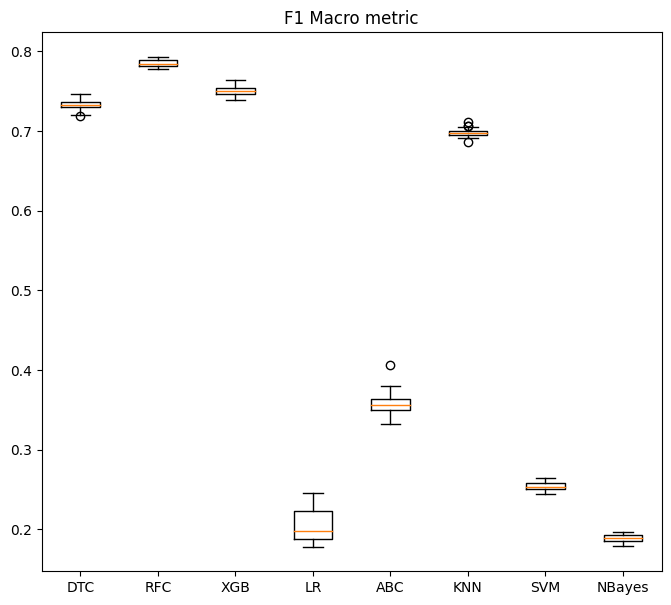

In [ ]:
fig = plt.figure(figsize =(8, 7))
labels = [
  "DTC", "RFC", "XGB", "LR",
  "ABC", "KNN", "SVM", "NBayes"
]
# Creating plot
plt.boxplot(
  [
    result[name]['test_f1_score'] for name in models_names
  ],
  labels=labels
)
plt.title("F1 Macro metric")

# show plot
plt.show()

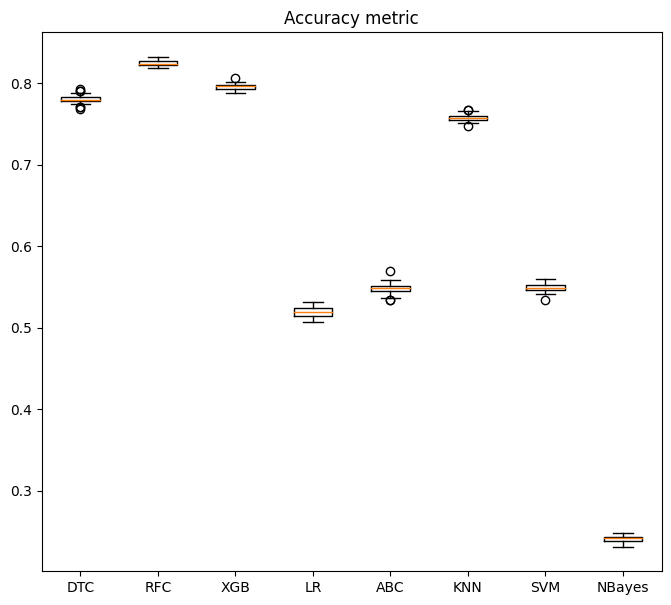

In [ ]:
fig = plt.figure(figsize =(8, 7))
# Creating plot
plt.boxplot(
  [
    result[name]['test_accuracy'] for name in models_names
  ],
  labels=labels
)
plt.title("Accuracy metric")

# show plot
plt.show()

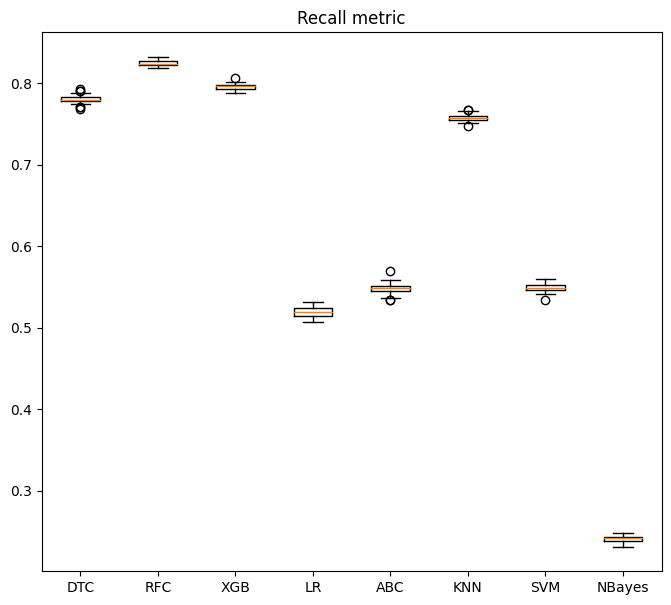

In [ ]:
fig = plt.figure(figsize =(8, 7))
# Creating plot
plt.boxplot(
  [
    result[name]['test_recall'] for name in models_names
  ],
  labels=labels
)
plt.title("Recall metric")

# show plot
plt.show()

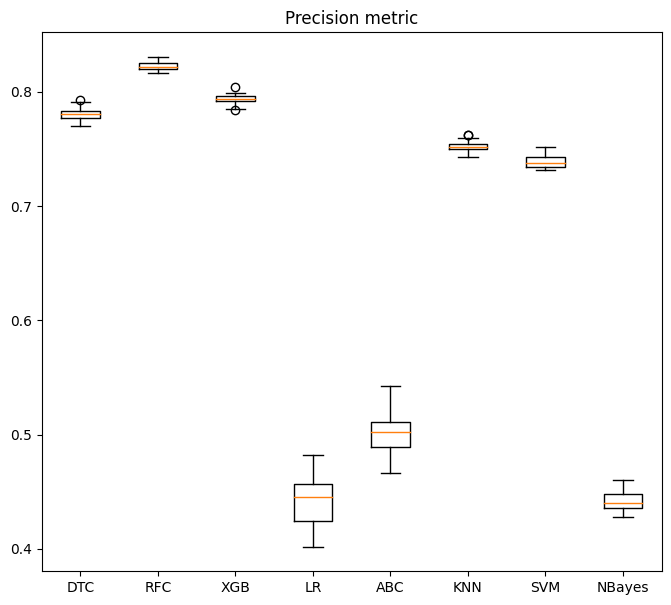

In [ ]:
fig = plt.figure(figsize =(8, 7))
# Creating plot
plt.boxplot(
  [
    result[name]['test_precision'] for name in models_names
  ],
  labels=labels
)
plt.title("Precision metric")

# show plot
plt.show()

## Compare the winning algorithm (Random forest) trained with all the features vs the same algorithm with only the most important features.

Accuracy of the model on Testing Sample Data: 0.83


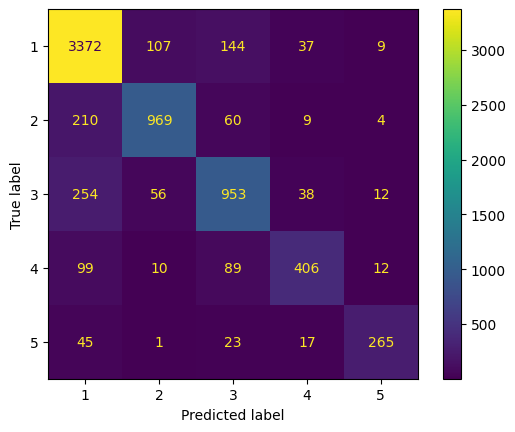

In [ ]:
feature_names = df.columns[:-1]

#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=200, random_state=0)

# Attach feature names to the model
rf_clf.feature_names_ = list(feature_names)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train, y_train)

predicted_rf=rf_clf.predict(X_test)

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, predicted_rf, average='weighted')
ac_rfc = round(F1_Score, 2)
print('Accuracy of the model on Testing Sample Data:', ac_rfc)

render_confusion_matrix(y_test, predicted_rf, rf_clf.classes_)

Elapsed time to compute the importances: 0.059 seconds
payment_term                               0.104542
factura_importe                            0.096298
SumAmountTotalPaidInvoices                 0.068759
NumberTotalPaidInvoices                    0.065384
linea_limite                               0.061249
RatioInvoicesPaidLate                      0.060512
RatioSumAmountInvoicesPaidLate             0.060482
SumAmountTotalOutstandingInvoices          0.054466
cliente_edad                               0.052637
NumberTotalOutstandingInvoices             0.048384
RatioOutstandingLateInvoices               0.046621
SumAmountInvoicesPaidLate                  0.045481
RatioSumAmountOutstandingLateInvoice       0.044158
NumberInvoicesPaidLate                     0.043496
AvgDaysLateOutstandingInvoicesBeingLate    0.035173
NumberOutstandingLateInvoices              0.034512
SumAmountOutstandingLateInvoices           0.034317
AvgDaysLateInvoicesPaidLate                0.033416
porcentaj

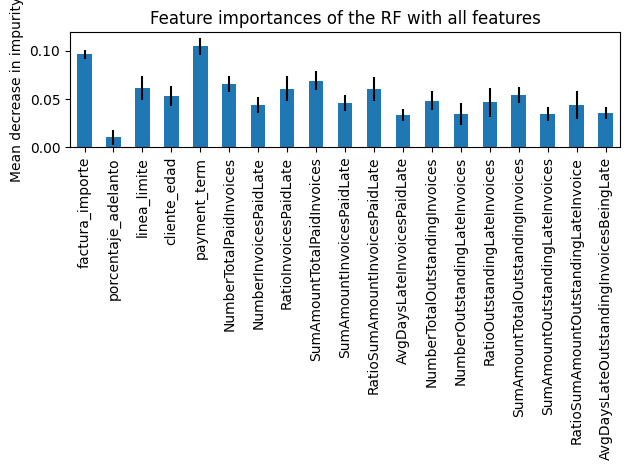

In [ ]:
import time
start_time = time.time()
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances of the RF with all features")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
print(forest_importances.sort_values(ascending=False))

In [ ]:
# payment_term                               0.104542
# factura_importe                            0.096298
# SumAmountTotalPaidInvoices                 0.068759
# NumberTotalPaidInvoices                    0.065384
# linea_limite                               0.061249
# RatioInvoicesPaidLate                      0.060512
# RatioSumAmountInvoicesPaidLate             0.060482
# SumAmountTotalOutstandingInvoices          0.054466
# cliente_edad                               0.052637
# NumberTotalOutstandingInvoices             0.048384
# RatioOutstandingLateInvoices               0.046621
# SumAmountInvoicesPaidLate                  0.045481
# RatioSumAmountOutstandingLateInvoice       0.044158
# NumberInvoicesPaidLate                     0.043496

# Extract the most important features
df_most_impt_feat = df[[
    'payment_term', 'factura_importe', 'SumAmountTotalPaidInvoices', 'NumberTotalPaidInvoices', 'linea_limite', 'RatioInvoicesPaidLate',
    'RatioSumAmountInvoicesPaidLate', 'SumAmountTotalOutstandingInvoices', 'cliente_edad',
    # 'NumberTotalOutstandingInvoices', 'RatioOutstandingLateInvoices', 'SumAmountInvoicesPaidLate', 'RatioSumAmountOutstandingLateInvoice', 'NumberInvoicesPaidLate',
    'PaidTime'
]]
df_most_impt_feat.head()

,payment_term,factura_importe,SumAmountTotalPaidInvoices,NumberTotalPaidInvoices,linea_limite,RatioInvoicesPaidLate,RatioSumAmountInvoicesPaidLate,SumAmountTotalOutstandingInvoices,cliente_edad,PaidTime
0,140.0,6905230.58,31836238.82,49,20000000.0,0.020408,0.004325,0.0,60.0,1
1,64.0,5486110.96,0.00,0,375000.0,0.000000,0.000000,0.0,11.0,1
2,147.0,5464161.79,0.00,0,20000000.0,0.000000,0.000000,0.0,60.0,1
3,29.0,5286577.84,24832580.74,13,9000000.0,0.307692,0.275770,0.0,10.0,1
4,186.0,5198617.84,17600606.68,43,20000000.0,0.023256,0.007823,4078948.6,60.0,1


Trainging dataset shape:  (16802, 9)
Test dataset shape:  (7201, 9)
Accuracy of the model on Testing Sample Data: 0.83


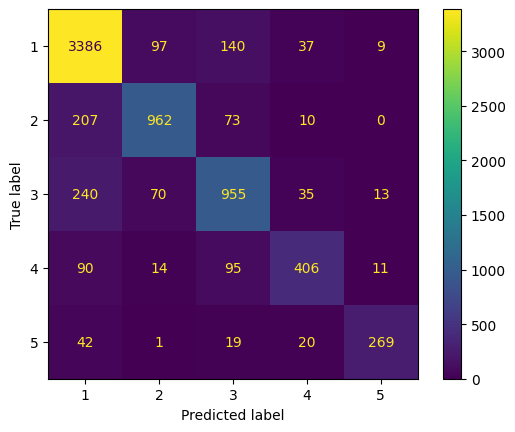

In [ ]:
X_imp_feat = df_most_impt_feat.drop(['PaidTime'], axis=1)
y_imp_feat = df_most_impt_feat.PaidTime
X_train_imp_feat, X_test_imp_feat, y_train_imp_feat, y_test_imp_feat = train_test_split(X_imp_feat, y_imp_feat, test_size=0.3, random_state=42)
print('Trainging dataset shape: ', X_train_imp_feat.shape)
print('Test dataset shape: ', X_test_imp_feat.shape)

#Create a Gaussian Classifier
rf_clf_imp_feat=RandomForestClassifier(n_estimators=200, random_state=0)

# Attach feature names to the model
rf_clf_imp_feat.feature_names_ = list(feature_names)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf_imp_feat.fit(X_train_imp_feat, y_train_imp_feat)

predicted_rf_imp_feat=rf_clf_imp_feat.predict(X_test_imp_feat)

# Printing the Overall Accuracy of the model
F1_Score_imp_feat=metrics.f1_score(y_test_imp_feat, predicted_rf_imp_feat, average='weighted')
ac_rfc_imp_feat = round(F1_Score_imp_feat, 2)
print('Accuracy of the model on Testing Sample Data:', ac_rfc_imp_feat)

render_confusion_matrix(y_test_imp_feat, predicted_rf_imp_feat, rf_clf_imp_feat.classes_)

In [ ]:
print('F1 macro metric with all features', ac_rfc)
print('F1 macro metric with select features', ac_rfc_imp_feat)

F1 macro metric with all features 0.83
F1 macro metric with select features 0.83


## 4.3 Helper functions

In [ ]:
def tranform_confusion_matrix(confusion_matrix, targets_list=None):
    """
    function to transform confusion matrix to dataframe needed to plot Sankey chart

    returns a dataframe and list of unique labels for Sankey chart nodes

    Parameters
    --------------
    confusion_matrix : numpy.ndarray
        The confusion matrix to be visualised
    target_list : {'list', 'numpy.ndarray'}
        List of unique classes

    """

    # create a dataframe

    if targets_list is None:
        df = pd.DataFrame(data=confusion_matrix,
                          index=[f"True Class-{i+1}" for i in range(confusion_matrix.shape[0])],
                          columns=[f"Predicted Class-{i+1}" for i in range(confusion_matrix.shape[0])])
    else:
        df = pd.DataFrame(data=confusion_matrix,
                          index=[f"True {i}" for i in targets_list],
                          columns=[f"Predicted {i}" for i in targets_list])

    # restructre the dataframe
    df = df.stack().reset_index()

    # rename the default column names
    df.rename(columns={'level_0':'source', 'level_1':'target', 0:'value'}, inplace=True)

    # add new column for colour
    # here rgba(211,255,216,0.6) indicates green colour whereas rgba(245,173,168,0.6) is red colour
    # green colour illustrates correct predictions and red colour is for incorrect predictions
    df["colour"] = df.apply(lambda x:
                              "rgba(211,255,216,0.6)" if x.source.split()[1:] == x.target.split()[1:]
                               else "rgba(245,173,168,0.6)", axis=1)

    # extract unique values from source and target columns
    labels = pd.concat([df.source, df.target]).unique()

    # get indices of the above unique values
    labels_indices = {label:index for index, label in enumerate(labels)}
    labels_indices

    # map the source and target column using the above indices
    df[["source", "target"]] = df[["source", "target"]].applymap(lambda x: labels_indices[x])

    # create a column for tooltip
    df["tooltip"] = df.apply(lambda x:
                             f"{x['value']} {' '.join(labels[x['source']].split()[1:])} instances correctly classified as {' '.join(labels[x['target']].split()[1:])}"
                             if x['colour']=='rgba(211,255,216,0.6)'

                             else
                             f"{x['value']} {' '.join(labels[x['source']].split()[1:])} instances misclassified as {' '.join(labels[x['target']].split()[1:])}", axis=1)

    return df, labels


def plot_sankey_for_confusion_matrix(df, labels):

    """
    plots sankey diagram from given dataframe and labels
    """

    # plot figure
    fig = go.Figure(data=[go.Sankey(

    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 1.0),
      label = labels,

      # this template will be used to display text when hovering over nodes
      hovertemplate = "%{label} has total %{value:d} instances<extra></extra>"
    ),
    link = dict(
      source = df.source,
      target = df.target,
      value = df.value,
      color = df.colour,
      customdata = df['tooltip'],

      # this template will be used to display text when hovering over the links
      hovertemplate = "%{customdata}<extra></extra>"
    ))])

    fig.update_layout(title_text="Confusion Matrix Visualisation Using Sankey Diagram", font_size=13,
                      width=800, height=600)

    return fig

# Helper function to plot confusion matrix
def render_confusion_matrix(y_test_input, predicted, clasess):
    cm = confusion_matrix(y_test_input, predicted, labels=clasess)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasess)
    disp.plot()

# Helper function to plot models accuracies
def plot_models_accuracy(models_name, accuracies):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(models_name,accuracies)
    _ = plt.xticks(rotation=90,fontsize=14)
    plt.title('Compare accuracy (test)')
    # plt.ylim(70, 100)
    plt.show()


# 7. Working with Invoice level features only

In [ ]:
# X_invoice_level_features = df.loc[:, ['factura_importe', 'payment_term', 'linea_limite']]
X_invoice_level_features = df.loc[:, ['factura_importe', 'payment_term']]
X_invoice_level_features.head()

,factura_importe,payment_term
0,6905230.58,140.0
1,5486110.96,64.0
2,5464161.79,147.0
3,5286577.84,29.0
4,5198617.84,186.0


In [ ]:
# Break off validation set from training data set
X_train, X_test, y_train, y_test = train_test_split(X_invoice_level_features, y, train_size=0.8, test_size=0.2, random_state=0)
print('Trainging dataset shape: ', X_train.shape)
print('Test dataset shape: ', X_test.shape)

Trainging dataset shape:  (19202, 2)
Test dataset shape:  (4801, 2)


The Accuracy is:  49.218912726515306  %


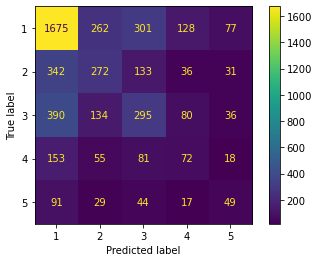

In [ ]:
#Create a Gaussian Classifier
rf_clf_invoice_level = RandomForestClassifier(n_estimators=200, random_state=0)

#Attach feature names to the model
rf_clf_invoice_level.feature_names_ = list(X_train.columns.values)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf_invoice_level.fit(X_train, y_train)

predicted_rf_invoice_level = rf_clf_invoice_level.predict(X_test)

ac_rfc_invoice_level = render_confusion_matrix(y_test, predicted_rf_invoice_level, rf_clf_invoice_level.classes_)

# 8. Working with Invoice + Customer level features

In [ ]:
X_invoice_customer_level_features = df.loc[:, ['factura_importe', 'linea_limite', 'cliente_regimen_fiscal', 'cliente_sector', 'cliente_edad', 'payment_term',]]
X_invoice_customer_level_features.head()

,factura_importe,linea_limite,cliente_regimen_fiscal,cliente_sector,cliente_edad,payment_term
0,6905230.58,20000000.0,0,0,60.0,140.0
1,5486110.96,375000.0,0,0,11.0,64.0
2,5464161.79,20000000.0,0,0,60.0,147.0
3,5286577.84,9000000.0,0,0,10.0,29.0
4,5198617.84,20000000.0,0,0,60.0,186.0


In [ ]:
# Break off validation set from training data set
X_train, X_test, y_train, y_test = train_test_split(X_invoice_customer_level_features, y, train_size=0.8, test_size=0.2, random_state=0)
print('Trainging dataset shape: ', X_train.shape)
print('Test dataset shape: ', X_test.shape)

Trainging dataset shape:  (19202, 6)
Test dataset shape:  (4801, 6)


The Accuracy is:  60.15413455530098  %


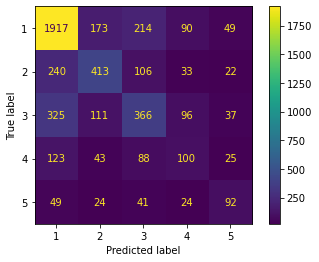

In [ ]:
#Create a Gaussian Classifier
rf_clf_invoice_customer_level = RandomForestClassifier(n_estimators=200, random_state=0)

#Attach feature names to the model
rf_clf_invoice_customer_level.feature_names_ = list(X_train.columns.values)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf_invoice_customer_level.fit(X_train, y_train)

predicted_rf_invoice_level = rf_clf_invoice_customer_level.predict(X_test)

ac_rfc_invoice_level = render_confusion_matrix(y_test, predicted_rf_invoice_level, rf_clf_invoice_customer_level.classes_)

# 9. Save the selected model

In [ ]:
import joblib

model_name = 'model.joblib'
with open(model_name, 'wb') as f:
    joblib.dump(rf_clf, f)

print("Model was saved.")

with open('model.joblib', 'rb') as f:
    predictor = joblib.load(f)

df_predict = X_test.iloc[0:1]

print('Prediction:', predictor.predict(df_predict))

Model was saved.
Prediction: [3]


# 10. Model Deployment Script

In [ ]:
import json
import os
import joblib
import pickle
import tarfile
import sagemaker
from sagemaker.estimator import Estimator
from sagemaker import get_execution_role
import time
from time import gmtime, strftime
import subprocess

In [ ]:
#Setup
client = boto3.client(service_name="sagemaker")
runtime = boto3.client(service_name="sagemaker-runtime")
boto_session = boto3.session.Session()

s3_resource = boto3.Session().resource('s3')
region = boto_session.region_name
print(region)
sagemaker_session = sagemaker.Session()

role = get_execution_role()
print(role)

us-west-2
arn:aws:iam::244210425001:role/service-role/AmazonSageMaker-ExecutionRole-20220610T101490


In [ ]:
bashCommand = "tar -cvpzf model.tar.gz model.joblib inference.py"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

In [ ]:
#Upload tar.gz to bucket
model_artifacts = f"s3://{bucket_name}/output/multiclass-clasification/model/model.tar.gz"

response = s3_resource.meta.client.upload_file('model.tar.gz', bucket_name, 'output/multiclass-clasification/model/model.tar.gz')
# TODO Remove model.joblib and model.tar.gz if they will no longer needed

In [ ]:
region = boto3.Session().region_name

# Retrieve sklearn image
image_uri = sagemaker.image_uris.retrieve(
    framework="sklearn",
    region=region,
    version="1.0-1",
    py_version="py3",
    instance_type="ml.m5.xlarge",
)

In [ ]:
#Step 1: Model Creation
model_name = "sklearn-test" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Model name: " + model_name)
create_model_response = client.create_model(
    ModelName=model_name,
    Containers=[
        {
            "Image": image_uri,
            "Mode": "SingleModel",
            "ModelDataUrl": model_artifacts,
            "Environment": {'SAGEMAKER_SUBMIT_DIRECTORY': model_artifacts,
                           'SAGEMAKER_PROGRAM': 'inference.py'}
        }
    ],
    ExecutionRoleArn=role,
)

print("Model Arn: " + create_model_response["ModelArn"])

Model name: sklearn-test2022-10-31-18-30-30
Model Arn: arn:aws:sagemaker:us-west-2:244210425001:model/sklearn-test2022-10-31-18-30-30


In [ ]:
#Step 2: EPC Creation
sklearn_epc_name = "sklearn-epc" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName=sklearn_epc_name,
    ProductionVariants=[
        {
            "VariantName": "sklearnvariant",
            "ModelName": model_name,
            "InstanceType": "ml.c5.large",
            "InitialInstanceCount": 1
        },
    ],
)

print("Endpoint Configuration Arn: " + endpoint_config_response["EndpointConfigArn"])

Endpoint Configuration Arn: arn:aws:sagemaker:us-west-2:244210425001:endpoint-config/sklearn-epc2022-10-31-18-30-34


In [ ]:
#Step 3: EP Creation
endpoint_name = "sklearn-local-ep" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
create_endpoint_response = client.create_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=sklearn_epc_name,
)
print("Endpoint Arn: " + create_endpoint_response["EndpointArn"])

#Monitor creation
describe_endpoint_response = client.describe_endpoint(EndpointName=endpoint_name)
while describe_endpoint_response["EndpointStatus"] == "Creating":
    describe_endpoint_response = client.describe_endpoint(EndpointName=endpoint_name)
    print(describe_endpoint_response["EndpointStatus"])
    time.sleep(15)
print(describe_endpoint_response)

Endpoint Arn: arn:aws:sagemaker:us-west-2:244210425001:endpoint/sklearn-local-ep2022-10-31-18-30-39
Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
InService
{'EndpointName': 'sklearn-local-ep2022-10-31-18-30-39', 'EndpointArn': 'arn:aws:sagemaker:us-west-2:244210425001:endpoint/sklearn-local-ep2022-10-31-18-30-39', 'EndpointConfigName': 'sklearn-epc2022-10-31-18-30-34', 'ProductionVariants': [{'VariantName': 'sklearnvariant', 'DeployedImages': [{'SpecifiedImage': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-scikit-learn:1.0-1-cpu-py3', 'ResolvedImage': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-scikit-learn@sha256:e7887de688db0abeb4ae7f0467d18c69c613d3795bc23c425ec0574b19b81350', 'ResolutionTime': datetime.datetime(2022, 10, 31, 18, 30, 41, 60000, tzinfo=tzlocal())}], 'CurrentWeight': 1.0, 'DesiredWeight': 1.0, 'CurrentInstanceCount': 1, 'DesiredInstanceCount': 1}], 'EndpointStatus': 'InService', 'CreationTime': datetime.datetim

# 11. Model invocation

In [ ]:
row = X_test.iloc[0:1]
# row = [200.0,2018.0,37400.0,445,17,50,12874467.33,206333.52,0.016027,103.0,49,1,0.020408,5,4,0.00144]
row = row.values[0].tolist()
print(row)

[37400.0, 65.0, 445.0, 17.0, 0.038202247191011236, 12874467.33, 206333.52000000002, 0.016026567524017325, 100.3529411764706, 49.0, 1.0, 0.02040816326530612, 2423289.33, 3489.28, 0.001439894096343832, 103.0]


In [ ]:
import boto3
import json
print(endpoint_name)
# endpoint_name = 'sklearn-local-ep2022-10-10-15-53-04'
runtime_client = boto3.client('sagemaker-runtime')
content_type = "application/json"
# request_body = {"Input": [[0.09178, 0.0, 4.05, 0.0, 0.51, 6.416, 84.1, 2.6463, 5.0, 296.0, 16.6, 395.5, 9.04]]}

request_body = {"Input": [row]}

data = json.loads(json.dumps(request_body))
payload = json.dumps(data)

response = runtime_client.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType=content_type,
    Body=payload)
result = json.loads(response['Body'].read().decode())
print(result['Output'])

sklearn-local-ep2022-10-31-18-30-39
[1]


# Clean up
## Deleting the endpoint
Once that we're donde predicting, we can delete the endpoint (and stop paying for it). We can re-deploy again by running the appropiate cell above.

In [ ]:
sagemaker.Session().delete_endpoint(endpoint_name=endpoint_name)
sagemaker.Session().delete_endpoint_config(sklearn_epc_name)